In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ICNSA.csv")

In [3]:
df.head()

,DATE,ICNSA
0,1967-01-07,346000
1,1967-01-14,334000
2,1967-01-21,277000
3,1967-01-28,252000
4,1967-02-04,274000


In [4]:
df.shape

(2980, 2)

In [5]:
df.describe

<bound method NDFrame.describe of             DATE   ICNSA
0     1967-01-07  346000
1     1967-01-14  334000
2     1967-01-21  277000
3     1967-01-28  252000
4     1967-02-04  274000
...          ...     ...
2975  2024-01-13  291330
2976  2024-01-20  249947
2977  2024-01-27  263919
2978  2024-02-03  234729
2979  2024-02-10  222164

[2980 rows x 2 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2980 non-null   object
 1   ICNSA   2980 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.7+ KB


In [7]:
df.isnull().sum()

DATE     0
ICNSA    0
dtype: int64

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.corr()

,DATE,ICNSA
DATE,1.000000,0.082902
ICNSA,0.082902,1.000000


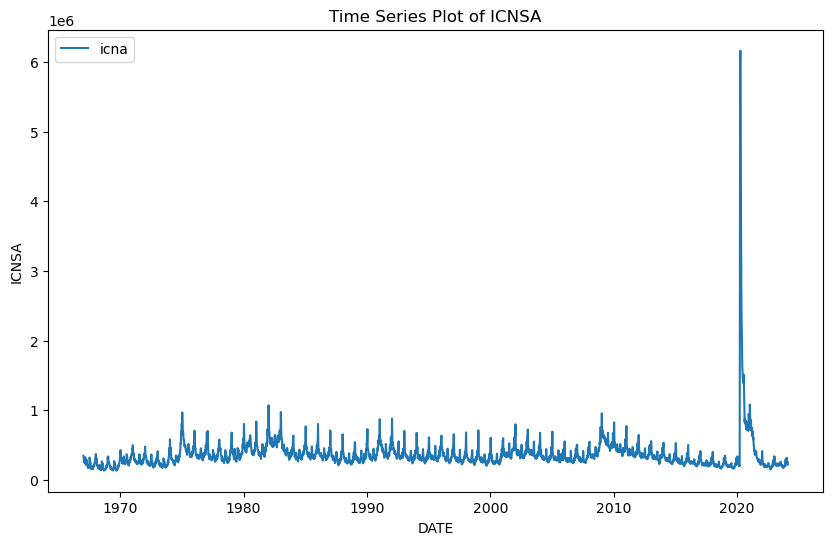

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['ICNSA'], label='icna')

plt.xlabel('DATE')
plt.ylabel('ICNSA')
plt.title('Time Series Plot of ICNSA')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


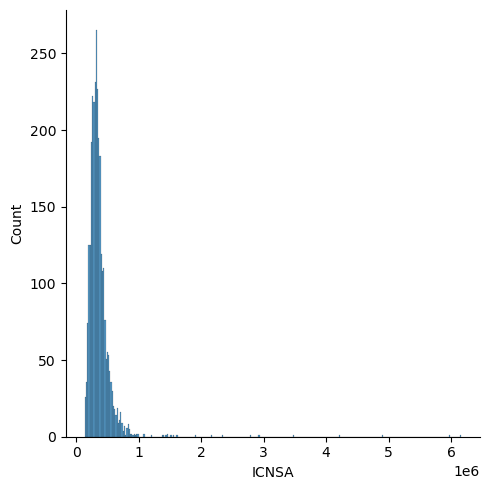

In [10]:
sns.displot(df['ICNSA'])

<Axes: >

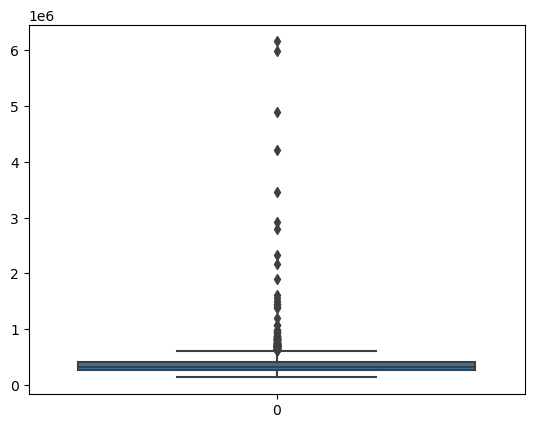

In [11]:
sns.boxplot(df['ICNSA'])

In [12]:
Q1 = df['ICNSA'].quantile(0.25)
Q3 = df['ICNSA'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

54412.875
618111.875


In [13]:
df['ICNSA'] = df['ICNSA'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


<Axes: >

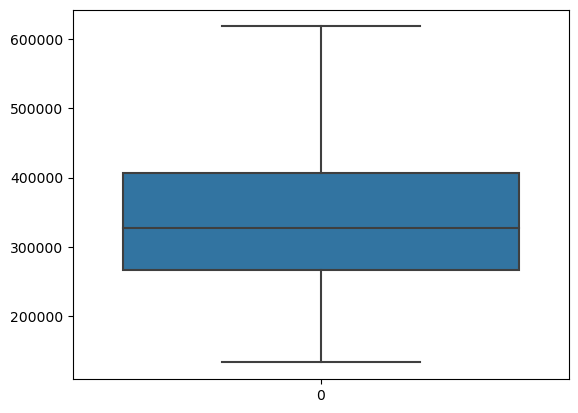

In [14]:
sns.boxplot(df['ICNSA'])

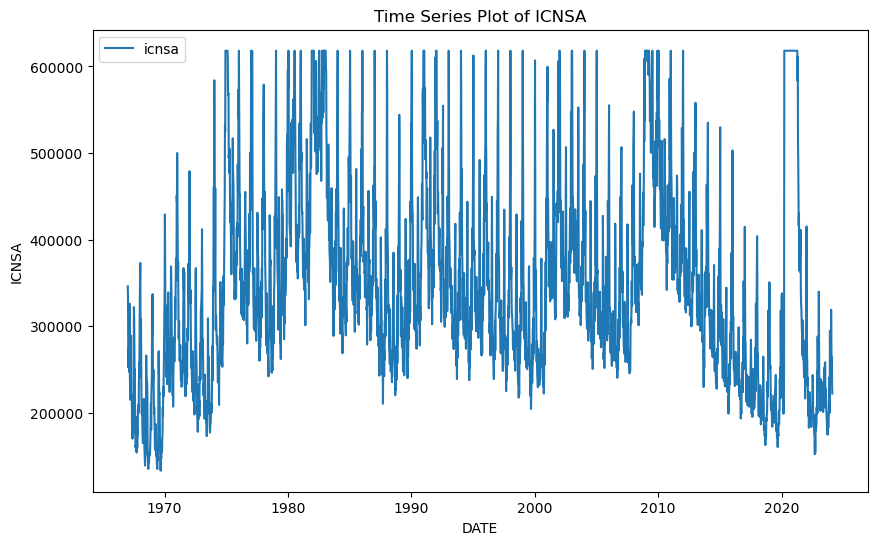

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['ICNSA'], label='icnsa')

plt.xlabel('DATE')
plt.ylabel('ICNSA')
plt.title('Time Series Plot of ICNSA')
plt.legend()
plt.show()

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

lag_periods = 3
for i in range(1, lag_periods + 1):
    df[f'ICNSA_lag_{i}'] = df['ICNSA'].shift(i)

df.dropna(inplace=True)

X = df[['ICNSA_lag_1', 'ICNSA_lag_2', 'ICNSA_lag_3']]
y = df['ICNSA']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

y_pred = results.predict(X_test)


                            OLS Regression Results                            
Dep. Variable:                  ICNSA   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     5086.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:00:38   Log-Likelihood:                -28710.
No. Observations:                2381   AIC:                         5.743e+04
Df Residuals:                    2377   BIC:                         5.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.038e+04   2843.911      7.166      

In [17]:
print("Forecast Values:")
print(y_pred)


Forecast Values:
2408    317821.940220
2853    290253.398537
1713    262045.831599
1116    264724.132188
967     464264.268390
            ...      
768     383139.959799
1272    367413.766444
2621    234871.293531
682     517750.372848
1242    381551.587578
Length: 596, dtype: float64


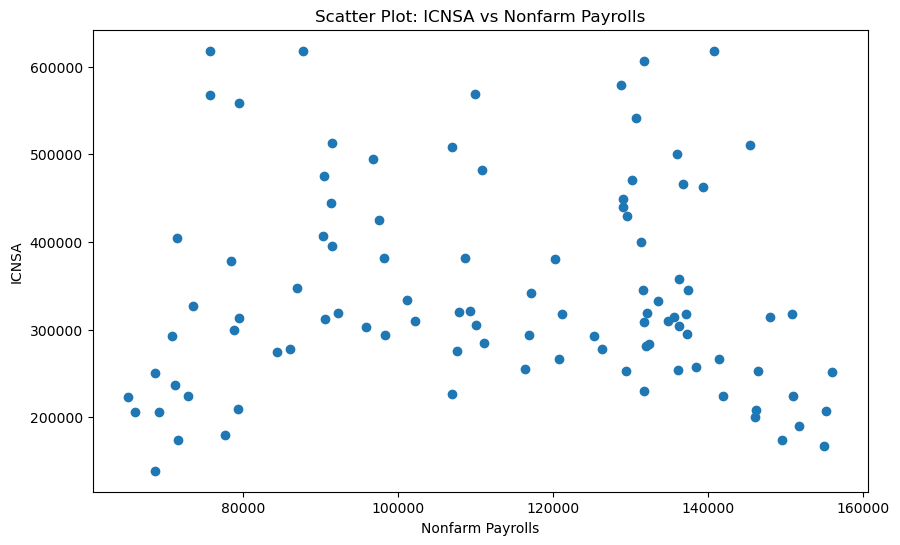

In [18]:
nonfarm_payrolls_df = pd.read_csv("PAYNSA.csv")

nonfarm_payrolls_df.head()

df['DATE'] = pd.to_datetime(df['DATE'])
nonfarm_payrolls_df['DATE'] = pd.to_datetime(nonfarm_payrolls_df['DATE'])

merged_df = pd.merge(df, nonfarm_payrolls_df, on='DATE', how='inner')

merged_df.isnull().sum()

correlation = merged_df[['ICNSA', 'PAYNSA']].corr()

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['PAYNSA'], merged_df['ICNSA'])
plt.xlabel('Nonfarm Payrolls')
plt.ylabel('ICNSA')
plt.title('Scatter Plot: ICNSA vs Nonfarm Payrolls')
plt.show()


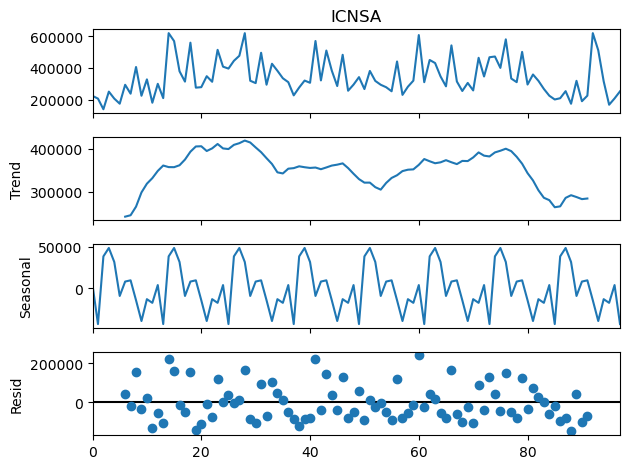

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_period = 12
decomposition_result = seasonal_decompose(merged_df['ICNSA'], model='additive', period=seasonal_period)
decomposition_result.plot()
plt.show()


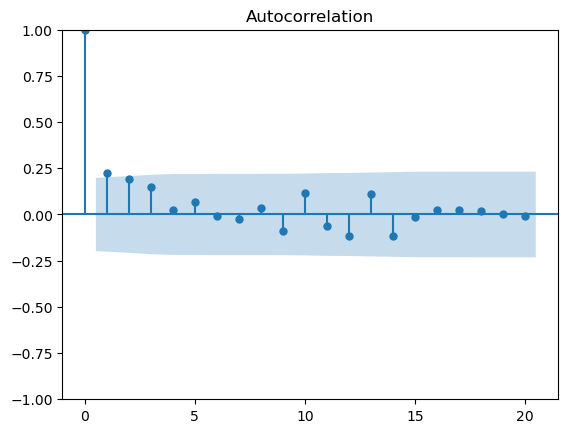

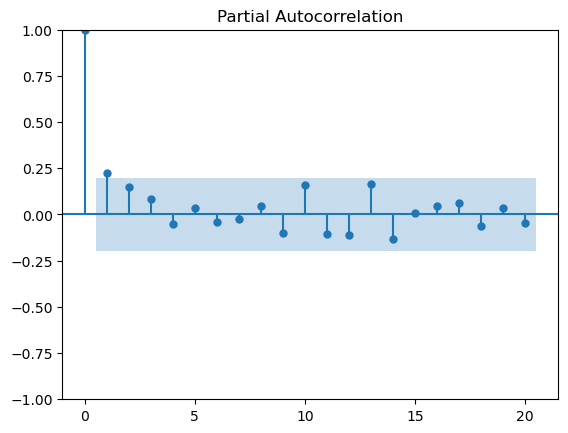

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(merged_df['ICNSA'])
plt.show()

plot_pacf(merged_df['ICNSA'])
plt.show()


In [21]:
merged_df = merged_df.dropna()

In [22]:
merged_df['ICNSA_lag_1'] = merged_df['ICNSA'].shift(1)

In [23]:
from sklearn.model_selection import train_test_split

X = merged_df[['PAYNSA']]
y = merged_df['ICNSA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from pmdarima import auto_arima

arima_model = auto_arima(y_train, exogenous=X_train, seasonal=True, suppress_warnings=True)
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:                        SARIMAX   Log Likelihood               -1023.612
Date:                Wed, 28 Feb 2024   AIC                           2051.223
Time:                        23:00:39   BIC                           2055.937
Sample:                             0   HQIC                          2053.110
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.397e+05    1.7e+04     19.980      0.000    3.06e+05    3.73e+05
sigma2      1.466e+10   3.12e+09      4.696      0.000    8.54e+09    2.08e+10
Ljung-Box (L1) (Q):                   0.03   Jarque-

In [25]:
forecast, conf_int = arima_model.predict(n_periods=len(y_test), exogenous=X_test, return_conf_int=True)
forecast_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test.values,
    'Forecast': forecast,
    'Lower_CI': conf_int[:, 0],
    'Upper_CI': conf_int[:, 1]
})

print(forecast_df)

    Date    Actual       Forecast       Lower_CI       Upper_CI
78    62  449286.0  339658.315705  102326.415234  576990.216176
79    40  305510.0  339658.315705  102326.415234  576990.216176
80    94  314796.0  339658.315705  102326.415234  576990.216176
81    18  558000.0  339658.315705  102326.415234  576990.216176
82    81  357742.0  339658.315705  102326.415234  576990.216176
83    83  266921.0  339658.315705  102326.415234  576990.216176
84    64  345573.0  339658.315705  102326.415234  576990.216176
85    42  320632.0  339658.315705  102326.415234  576990.216176
86    10  327000.0  339658.315705  102326.415234  576990.216176
87     0  223000.0  339658.315705  102326.415234  576990.216176
88    31  494700.0  339658.315705  102326.415234  576990.216176
89    75  399350.0  339658.315705  102326.415234  576990.216176
90    47  255588.0  339658.315705  102326.415234  576990.216176
91    26  444000.0  339658.315705  102326.415234  576990.216176
92    44  382138.0  339658.315705  10232

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
last_forecast_row = forecast_df.iloc[-1]

forecast_value = last_forecast_row['Forecast']
lower_ci = last_forecast_row['Lower_CI']
upper_ci = last_forecast_row['Upper_CI']

print(f"So I forecast the new data release value will be {forecast_value:.1f} with confidence interval ({lower_ci:.1f}, {upper_ci:.1f})")


So I forecast the new data release value will be 339658.3 with confidence interval (102326.4, 576990.2)
